In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transactions_df = pd.read_csv("Transactions.csv")

In [3]:
products_df = pd.read_csv("Products.csv")

In [4]:
customers_df = pd.read_csv("Customers.csv")

In [5]:
merged_df = transactions_df.merge(products_df, on="ProductID", how="left") \
                           .merge(customers_df, on="CustomerID", how="left")

In [6]:
print("Basic Statistics for Transactions Dataset:")
print(transactions_df.describe())

Basic Statistics for Transactions Dataset:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [7]:
print("\nBasic Statistics for Products Dataset:")
print(products_df.describe())


Basic Statistics for Products Dataset:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [8]:
print("\nBasic Statistics for Customers Dataset:")
print(customers_df.describe())


Basic Statistics for Customers Dataset:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


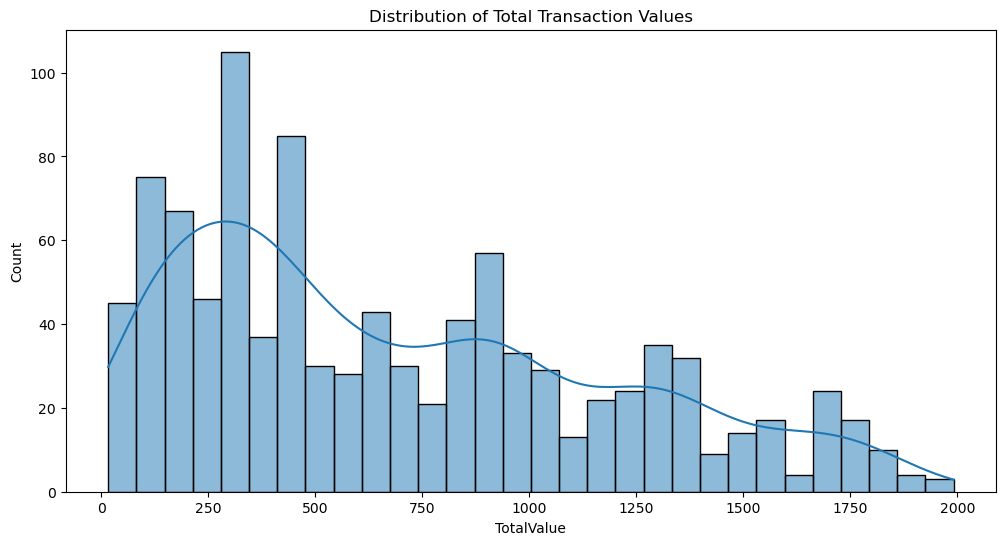

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['TotalValue'], bins=30, kde=True)
plt.title("Distribution of Total Transaction Values")
plt.show()

In [10]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales Value:")
print(top_products)


Top 5 Products by Sales Value:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64



Total Sales by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


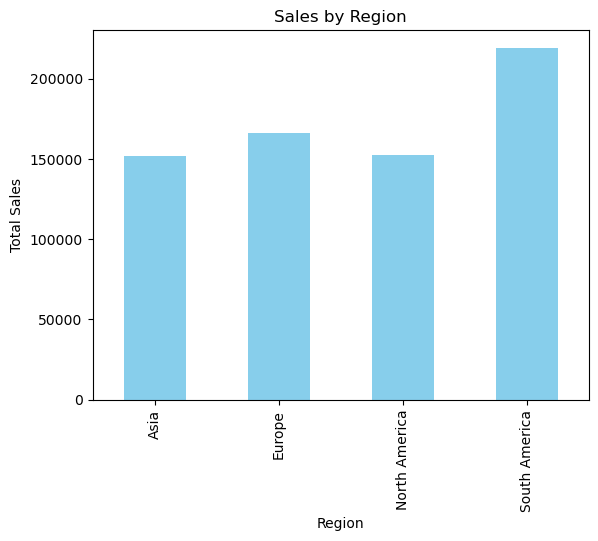

In [13]:
region_sales = merged_df.groupby('Region')['TotalValue'].sum()
print("\nTotal Sales by Region:")
print(region_sales)
region_sales.plot(kind='bar', title="Sales by Region", color='skyblue')
plt.ylabel("Total Sales")
plt.show()


Customer Distribution by Region:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


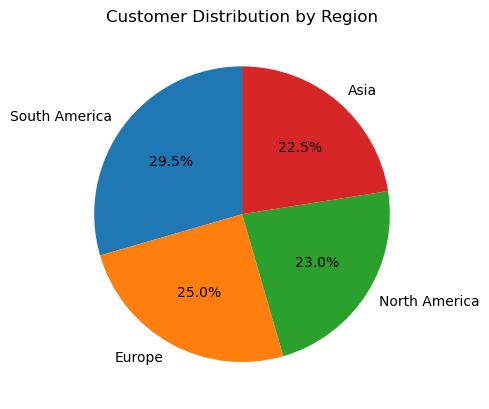

In [14]:
region_customers = customers_df['Region'].value_counts()
print("\nCustomer Distribution by Region:")
print(region_customers)
region_customers.plot(kind='pie', autopct='%1.1f%%', title="Customer Distribution by Region", startangle=90)
plt.ylabel("")
plt.show()

In [15]:
print("\nBusiness Insights:")
print("1. The top-selling product is:", top_products.idxmax())
print("2. The region with the highest sales is:", region_sales.idxmax())
print("3. Average transaction value across all regions is:", merged_df['TotalValue'].mean())
print("4. South America has the most customers, with:", region_customers.max(), "customers.")
print("5. There is a significant price range across products, with prices varying from",
      products_df['Price'].min(), "to", products_df['Price'].max())


Business Insights:
1. The top-selling product is: ActiveWear Smartwatch
2. The region with the highest sales is: South America
3. Average transaction value across all regions is: 689.9955600000001
4. South America has the most customers, with: 59 customers.
5. There is a significant price range across products, with prices varying from 16.08 to 497.76
